In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import sheets
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('scores.csv')


In [23]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [5]:
df.describe()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
count,55.000000,55.000000,23.000000,20.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,12.600000,1.454545,1.739130,1.950000,1.782609,1.521739,1.869565,22.739130,20.000000
std,2.491467,0.502519,0.540824,0.223607,0.421741,0.510754,0.344350,4.797892,4.729021
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,11.000000
25%,13.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,18.500000,16.000000
50%,13.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,21.000000
75%,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.000000,24.500000
max,20.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,29.000000,28.000000


In [26]:
df.isna().sum()


,0
number,0
days,0
gender,0
age,0
afftype,32
melanch,35
inpatient,32
edu,2
marriage,32
work,32


In [21]:
cols=['days','gender','afftype','melanch','inpatient','marriage','age','work','madrs1','madrs2','edu']
dfx=df[cols]

In [22]:
dfx

,days,gender,afftype,melanch,inpatient,marriage,age,work,madrs1,madrs2,edu
0,11,2,2.0,2.0,2.0,1.0,35-39,2.0,19.0,19.0,6-10
1,18,2,1.0,2.0,2.0,2.0,40-44,2.0,24.0,11.0,6-10
2,13,1,2.0,2.0,2.0,2.0,45-49,2.0,24.0,25.0,6-10
3,13,2,2.0,2.0,2.0,1.0,25-29,1.0,20.0,16.0,11-15
4,13,2,2.0,2.0,2.0,2.0,50-54,2.0,26.0,26.0,11-15
5,7,1,2.0,2.0,2.0,1.0,35-39,2.0,18.0,15.0,6-10
6,11,1,1.0,NaN,2.0,2.0,20-24,1.0,24.0,25.0,11-15
7,5,2,2.0,NaN,2.0,1.0,25-29,2.0,20.0,16.0,11-15
8,13,2,1.0,NaN,2.0,1.0,45-49,2.0,26.0,26.0,6-10
9,9,2,2.0,2.0,2.0,1.0,45-49,2.0,28.0,21.0,6-10


In [24]:
dfx.head()

,days,gender,afftype,melanch,inpatient,marriage,age,work,madrs1,madrs2,edu
0,11,2,2.0,2.0,2.0,1.0,35-39,2.0,19.0,19.0,6-10
1,18,2,1.0,2.0,2.0,2.0,40-44,2.0,24.0,11.0,6-10
2,13,1,2.0,2.0,2.0,2.0,45-49,2.0,24.0,25.0,6-10
3,13,2,2.0,2.0,2.0,1.0,25-29,1.0,20.0,16.0,11-15
4,13,2,2.0,2.0,2.0,2.0,50-54,2.0,26.0,26.0,11-15


In [25]:
dfx.isnull().sum()

,0
days,0
gender,0
afftype,32
melanch,35
inpatient,32
marriage,32
age,0
work,32
madrs1,32
madrs2,32


In [27]:
dfx.dropna(inplace=True)

<ipython-input-27-18b4e63ced5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx.dropna(inplace=True)


In [28]:
dfx.isnull().sum()

,0
days,0
gender,0
afftype,0
melanch,0
inpatient,0
marriage,0
age,0
work,0
madrs1,0
madrs2,0


In [29]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 22
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   days       20 non-null     int64  
 1   gender     20 non-null     int64  
 2   afftype    20 non-null     float64
 3   melanch    20 non-null     float64
 4   inpatient  20 non-null     float64
 5   marriage   20 non-null     float64
 6   age        20 non-null     object 
 7   work       20 non-null     float64
 8   madrs1     20 non-null     float64
 9   madrs2     20 non-null     float64
 10  edu        20 non-null     object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.9+ KB


In [30]:
dfx.describe()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,13.10000,1.550000,1.800000,1.950000,1.750000,1.550000,1.900000,22.650000,19.650000
std,2.33734,0.510418,0.523148,0.223607,0.444262,0.510418,0.307794,5.060424,4.659738
min,7.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,11.000000
25%,13.00000,1.000000,1.750000,2.000000,1.750000,1.000000,2.000000,18.000000,15.750000
50%,13.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,20.000000
75%,14.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.250000,23.250000
max,18.00000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,29.000000,28.000000


In [31]:
dfx

,days,gender,afftype,melanch,inpatient,marriage,age,work,madrs1,madrs2,edu
0,11,2,2.0,2.0,2.0,1.0,35-39,2.0,19.0,19.0,6-10
1,18,2,1.0,2.0,2.0,2.0,40-44,2.0,24.0,11.0,6-10
2,13,1,2.0,2.0,2.0,2.0,45-49,2.0,24.0,25.0,6-10
3,13,2,2.0,2.0,2.0,1.0,25-29,1.0,20.0,16.0,11-15
4,13,2,2.0,2.0,2.0,2.0,50-54,2.0,26.0,26.0,11-15
5,7,1,2.0,2.0,2.0,1.0,35-39,2.0,18.0,15.0,6-10
9,9,2,2.0,2.0,2.0,1.0,45-49,2.0,28.0,21.0,6-10
10,14,1,2.0,2.0,2.0,1.0,45-49,2.0,24.0,24.0,6-10
11,12,2,1.0,2.0,2.0,2.0,40-44,2.0,25.0,21.0,6-10
12,14,2,1.0,2.0,2.0,2.0,35-39,2.0,18.0,13.0,11-15


<Axes: >

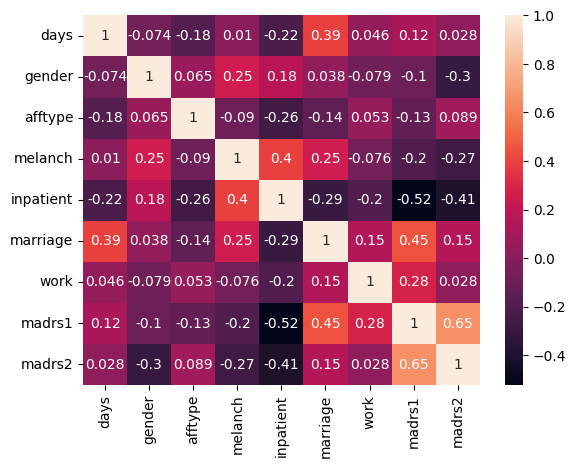

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
#

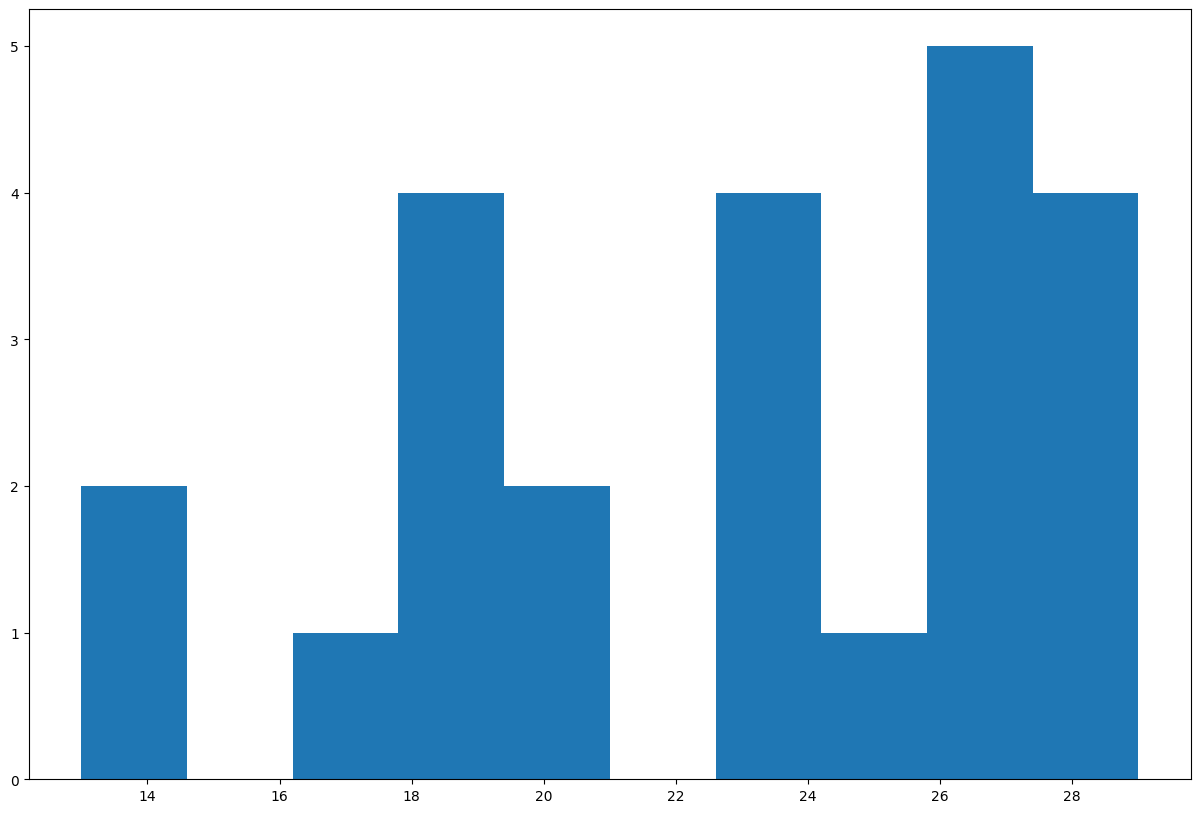

In [37]:
plt.figure(figsize=(15,10))
plt.hist(df['madrs1'])
plt.show()
#

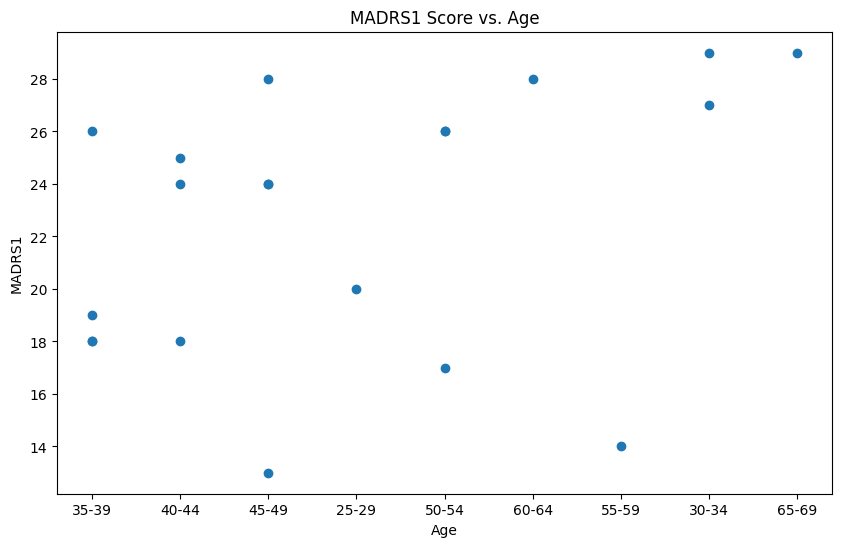

In [42]:
# prompt: age e bağlı madrs1 sütun grafiği oluştur

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(dfx['age'], dfx['madrs1'])
plt.xlabel('Age')
plt.ylabel('MADRS1')
plt.title('MADRS1 Score vs. Age')
plt.show()
